In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy
from scipy import fftpack
% matplotlib notebook

## Load and Fix Tables

Copy all XYZ table outputs found in "target_dir" on Spock over to local directory. The command has to manually be run in another terminal windows :(

In [6]:
# target_dir = '/home/holdenjb/Mapleseed/LES/LongRun_8_22_16/output/'
# local_dir = '/Users/jakeholden/Dropbox/MapleSeed/Thesis/Scripts/Result_calculations/LES/output/'
local_dir = 'C:\\Users\\Admin\\Dropbox\\MapleSeed\\Thesis\\Scripts\\Result_calculations\\LES\\output\\'  # winderz
os.chdir(local_dir)
copy_cmd = 'scp -P 63247 holdenjb@mccoy.ase.uc.edu:'+ target_dir +'XYZ_Internal_Table_probe_table* .'
# remember: input password in terminal window
# os.system(copy_cmd)
print copy_cmd

NameError: name 'target_dir' is not defined

In [3]:
torque_hist = 'Torque_wrt_x_via_moment_report_Monitor_Plot_seed_torquex_21561.csv'
df_torque_hist = pd.DataFrame.from_csv(local_dir+torque_hist, index_col=False)
plt.figure()
plt.plot(df_torque_hist['Time'], 10e4*df_torque_hist['Torque_wrt_x_via_moment_report Monitor: Torque_wrt_x_via_moment_report Monitor (N-m)'])
plt.ylabel('Torque about Rotational Axis (x 10e-4)')
plt.xlabel('Physical Time (s)')
plt.show()

IOError: File \Users\jakeholden\Dropbox\MapleSeed\Thesis\Scripts\Result_calculations\LES\output\Torque_wrt_x_via_moment_report_Monitor_Plot_seed_torquex_21561.csv does not exist

One at a time, read in XYZ table (at a particular time-step) and append each row to respective CSV files that contain running time histories for each probe.

In [9]:
# ts_data_dir = '/Users/jakeholden/Dropbox/MapleSeed/Thesis/Scripts/Result_calculations/LES/time_series_velocities/'
ts_data_dir = 'C:\\Users\\Admin\\Dropbox\\MapleSeed\\Thesis\\Scripts\\Result_calculations\\LES\\output\\' # winderz
file_list = os.listdir(local_dir)
count = 0
start_ts = 2.674600e-01
file_list = [f for f in file_list if f.startswith('XYZ')]
file_list = [f for f in file_list if float(f.split('_')[5].split('.csv')[0])>start_ts]

# for i in file_list:
#     count +=1
#     df_file = pd.read_csv(local_dir+i)
#     ts_str = i.split('_')[5]
#     ts = float(ts_str.split('.csv')[0])
#     for index, row in df_file.iterrows():
#         row_temp = pd.DataFrame(row).T
#         df_ts = pd.DataFrame({'time':[ts]}, index = [row_temp.index[0]])
# #         filename = 'Probe_'+str(row_temp.index[0])+'_'+str(float(row_temp[row_temp.columns[3]]))+\
# #             '_'+str(float(row_temp[row_temp.columns[4]]))+\
# #             '_'+str(float(row_temp[row_temp.columns[5]]))+'.csv'
#         filename = 'Probe'+'_'+str(float(row_temp[row_temp.columns[3]]))+\
#             '_'+str(float(row_temp[row_temp.columns[4]]))+\
#             '_'+str(float(row_temp[row_temp.columns[5]]))+'.csv'
#         row_temp = df_ts.join(row_temp)
#         if count==1:
#             row_temp.to_csv(ts_data_dir+filename,header=True,index=False,mode='w')
#         else:
#             row_temp.to_csv(ts_data_dir+filename,header=False,index=False,mode='a')

166

## Plot Time Series

Plot raw signals in i,j,k for origin to observe how much fluctuation is captured. From the figure it looks like periodicity is beginning to be captured (2 periods?). Those 2 periods almost exactly make up one blade pass frequency, interesting that this effect is the most amplified at the origin.

<IPython.core.display.Javascript object>


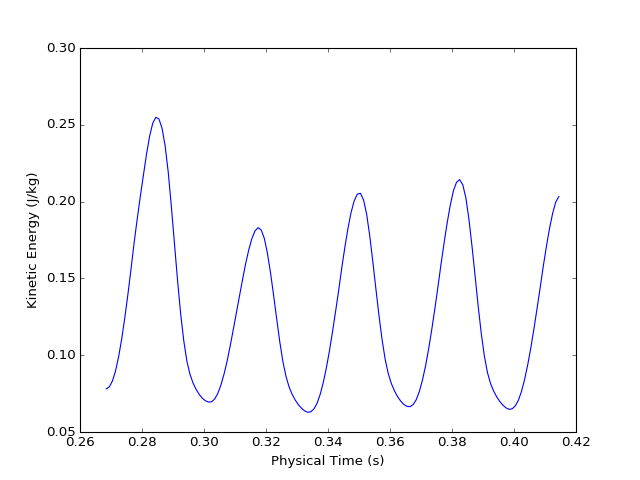

In [20]:
# ts_data_dir = '/Users/jakeholden/Dropbox/MapleSeed/Thesis/Scripts/Result_calculations/LES/time_series_velocities/'
plot_dir = '/Users/jakeholden/Dropbox/MapleSeed/Thesis/Scripts/Result_calculations/LES/plots/'
import numpy as np
ts_data_lst = os.listdir(ts_data_dir)
ts_data_lst = [i for i in ts_data_lst if i.endswith('.csv')]


# count = 0
# for i in ts_data_lst:
#     if i.endswith('0.0_0.0.csv'):
#         count+=1
#         df_temp = pd.DataFrame.from_csv(ts_data_dir+i)
#     #     sp = np.fft.fft(df_temp['Velocity in Rotating[i] (m/s)'])

#         # i = 'Probe_-0.075_-0.05_0.0.csv'
#         # df_temp = pd.DataFrame.from_csv(ts_data_dir+i)  
#         plt.figure()
#         plt.plot(df_temp['Velocity in Rotating[i] (m/s)']) 
#         plt.plot(df_temp['Velocity in Rotating[j] (m/s)'],'r')
#         plt.plot(df_temp['Velocity in Rotating[k] (m/s)'],'darkgoldenrod')
#         plt.xlabel('Physical Time (s)')
#         plt.ylabel('Velocity (m/s)')
#         plt.title('Probe Velocities')
#         plt.legend(['V[i]','V[j]','V[k]'])
#         plt.savefig(plot_dir+i+'.png')
#         plt.show()
#     else:
#         pass


# i2 = 'Probe_-0.075_-0.035_0.0.csv' #'Probe_0.05_-0.035_0.0.csv'
# i2 = 'Probe_-0.075_0.0_0.0.csv'
i2 = 'Probe_0.0_0.0_0.0.csv'
df_temp2 = pd.DataFrame.from_csv(ts_data_dir+i2)
t1 = np.array(df_temp2['Velocity in Rotating[i] (m/s)'])[:292]
t2 = np.array(df_temp2['Velocity in Rotating[j] (m/s)'])[:292]
t3 = np.array(df_temp2['Velocity in Rotating[k] (m/s)'])[:292]
t = 0.5*((t1**2+t2**2+t3**2)**.5)**2
# t = 0.5*(t1**2+t2**2+t3**2)
plt.figure()
# plt.plot(df_temp2['Velocity in Rotating[i] (m/s)'][:146]) 
# plt.plot(df_temp2['Velocity in Rotating[j] (m/s)'][:146],'r')
# plt.plot(df_temp2['Velocity in Rotating[k] (m/s)'][:146],'darkgoldenrod')
plt.plot(np.array(df_temp2.index[0:292]),t)
plt.xlabel('Physical Time (s)')
plt.ylabel('Kinetic Energy (J/kg)')
plt.show()

## FFT

<IPython.core.display.Javascript object>


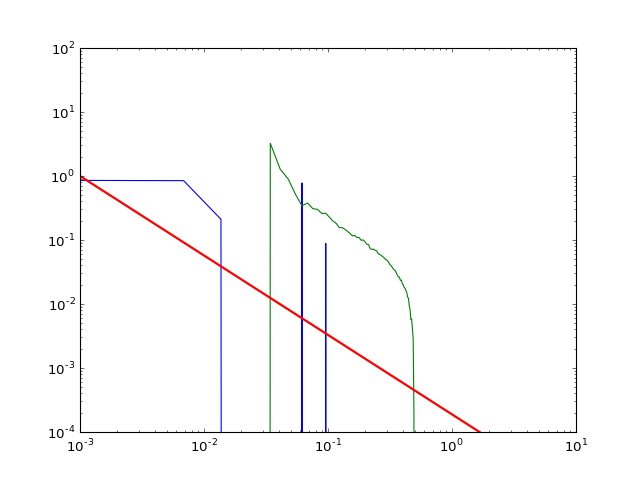

In [144]:
# t1 = np.array(df_temp2['Velocity in Rotating[i] (m/s)'][:146])
# t2 = np.array(df_temp2['Velocity in Rotating[j] (m/s)'][:146])
# t3 = np.array(df_temp2['Velocity in Rotating[k] (m/s)'][:146])
# t = 0.5*(t1**2+t2**2+t3**2)
sp = np.fft.rfft(t)
freq = np.fft.rfftfreq(t.shape[-1])
fig= plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(freq, sp.real, freq, sp.imag)
# plt.plot(freq, sp.real)
plt.loglog([1e-3, 1.66693], [1, 1e-4], color='red', linestyle='-', linewidth=2)
ax.set_yscale('log')
ax.set_xscale('log')
# plt.axis('equal')
plt.show()

## FFT2

<IPython.core.display.Javascript object>


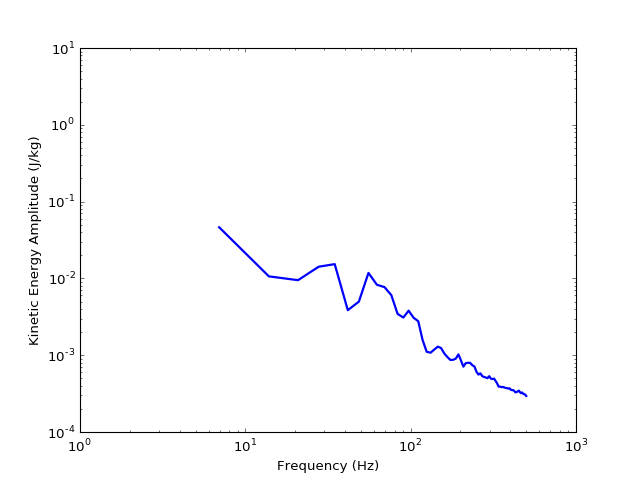

In [17]:
# Number of samplepoints
N = 146
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N)
y = t
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.loglog(xf, 2.0/N * np.abs(yf[:N//2]), linewidth=2)
# plt.loglog([1e-3, 1.66693], [1, 1e-4], color='red', linestyle='-', linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Kinetic Energy Amplitude (J/kg)')
plt.show()

In [14]:
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange

def plotSpectrum(y,Fs):
 """
 Plots a Single-Sided Amplitude Spectrum of y(t)
 """
 n = len(y) # length of the signal
 k = arange(n)
 T = n/Fs
 frq = k/T # two sides frequency range
 frq = frq[range(n/2)] # one side frequency range

 Y = fft(y)/n # fft computing and normalization
 Y = Y[range(n/2)]
 
 plot(frq,abs(Y),'r') # plotting the spectrum
 xlabel('Freq (Hz)')
 ylabel('|Y(freq)|')

In [ ]:
ts_data_dir = '/Users/jakeholden/Dropbox/MapleSeed/Thesis/Scripts/Result_calculations/LES/time_series_velocities/'
import numpy as np
ts_data_lst = os.listdir(ts_data_dir)
ts_data_lst = [i for i in ts_data_lst if i.endswith('.csv')]
count = 0
for i in ts_data_lst:
    count+=1
    df_temp = pd.DataFrame.from_csv(ts_data_dir+i)
    if count>0:
        continue

Fs = 340.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y = list(df_temp['Velocity in Rotating[i] (m/s)'])

subplot(2,1,1)
plot(t,y)
xlabel('Time')
ylabel('Amplitude')
subplot(2,1,2)
plotSpectrum(y,Fs)
show()

In [21]:
ts_data_dir = '/Users/jakeholden/Dropbox/MapleSeed/Thesis/Scripts/Result_calculations/LES/time_series_velocities/'
import numpy as np
ts_data_lst = os.listdir(ts_data_dir)
ts_data_lst = [i for i in ts_data_lst if i.endswith('.csv')]
count = 0
for i in ts_data_lst:
    count+=1
    df_temp = pd.DataFrame.from_csv(ts_data_dir+i)
    sp = np.fft.fft(df_temp['Velocity in Rotating[i] (m/s)'])
    
    if count>0:
        continue

In [23]:
len(list(df_temp['Velocity in Rotating[i] (m/s)']))

340

## Tip Probe - Suction Side

In [92]:
main_dir = '/Users/jakeholden/Dropbox/MapleSeed/Thesis/Scripts/Result_calculations/LES/'
df_suction_tip = pd.DataFrame.from_csv(main_dir+'Vi_suction_tip_probe.csv', index_col=False)
df_suction_tip = df_suction_tip.rename(index=str, columns={'V_i_suction_tip_probe Monitor: V_i_suction_tip_probe Monitor (m/s)': "Vi"})
df_suction_tip['dt'] = df_suction_tip['Time'] - df_suction_tip['Time'].shift(-1)

<IPython.core.display.Javascript object>


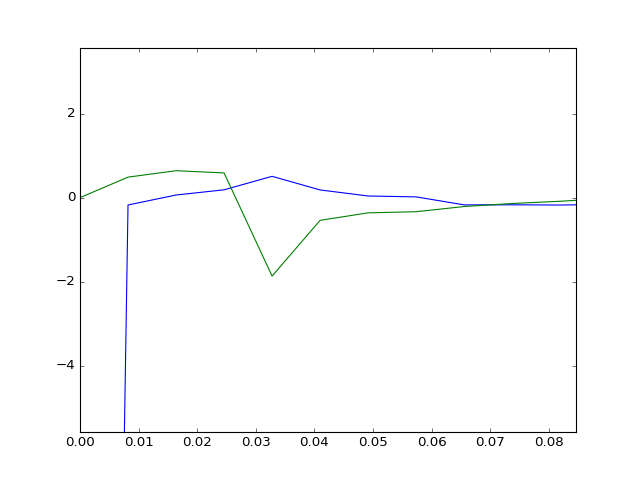

In [103]:
t = np.array(df_suction_tip[df_suction_tip['dt']< -.0009]['Vi'])
sp = np.fft.rfft(t)
freq = np.fft.rfftfreq(t.shape[-1])
plt.figure()
plt.plot(freq, sp.real, freq, sp.imag)
# plt.plot([0, .3], [.5, 0], color='red', linestyle='-', linewidth=2)
plt.show()